<a href="https://colab.research.google.com/github/nadya-az/artificial_neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

1.1  Разбиваем данные на обучение и тест


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

X_train[0]

array([   4.2386    ,    6.        ,    7.72307692,    1.16923077,
        228.        ,    3.50769231,   33.83      , -117.55      ])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

X_train[0]
X_test[0]

array([0.2518517 , 0.41176471, 0.08193933, 0.05890028, 0.09468   ,
       0.00280715, 0.00215517, 0.74588477])

1.2 Создаем архитектуру 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(8, ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1152      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[-0.10708372,  0.07524724,  0.02317506, ..., -0.0005445 ,
          0.13537033, -0.07855888],
        [ 0.19603352, -0.11142357,  0.01911443, ..., -0.06549481,
          0.20812123, -0.09801345],
        [-0.08834351,  0.08545561,  0.15941428, ...,  0.01510917,
         -0.1373133 ,  0.06894378],
        ...,
        [-0.14670977, -0.01143745,  0.08094801, ...,  0.13821681,
          0.19002928, -0.09112589],
        [-0.15840326,  0.01924445, -0.12197278, ...,  0.02469768,
          0.09188716, -0.12027414],
        [ 0.11471553, -0.08533332, -0.15921247, ..., -0.01114875,
          0.0140453 ,  0.12040575]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

1.3 Скомпилируем сеть

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


1.4 Обучение нейросети


In [ ]:
EPOCH = 50

In [ ]:
H = model.fit(X_train, y_train, epochs=EPOCH, validation_split=0.025)

Epoch 1/50
504/504 [==============================] - 2s 3ms/step - loss: 0.9139 - mae: 0.6938 - val_loss: 0.4857 - val_mae: 0.5033
Epoch 2/50
504/504 [==============================] - 52s 104ms/step - loss: 0.5414 - mae: 0.5370 - val_loss: 0.4476 - val_mae: 0.4875
Epoch 3/50
504/504 [==============================] - 1s 2ms/step - loss: 0.4960 - mae: 0.5099 - val_loss: 0.4286 - val_mae: 0.4866
Epoch 4/50
504/504 [==============================] - 1s 2ms/step - loss: 0.4650 - mae: 0.4890 - val_loss: 0.4010 - val_mae: 0.4734
Epoch 5/50
504/504 [==============================] - 1s 2ms/step - loss: 0.4423 - mae: 0.4726 - val_loss: 0.4461 - val_mae: 0.4609
Epoch 6/50
504/504 [==============================] - 1s 2ms/step - loss: 0.4266 - mae: 0.4623 - val_loss: 0.4243 - val_mae: 0.4495
Epoch 7/50
504/504 [==============================] - 1s 2ms/step - loss: 0.4185 - mae: 0.4551 - val_loss: 0.3736 - val_mae: 0.4377
Epoch 8/50
504/504 [==============================] - 1s 2ms/step - loss:

1.5 Вывод об обучении модели

Модель обучается хорошо

1.6 Предсказание на тестовых данных

1.7 Метрика качества на тестовых данных


In [ ]:
print("Предсказание нейронной сети: ")
print(model.evaluate(X_test, y_test))

Предсказание нейронной сети: 
129/129 [==============================] - 0s 2ms/step - loss: 2.2776 - mae: 1.2269
[2.2776169776916504, 1.226916790008545]


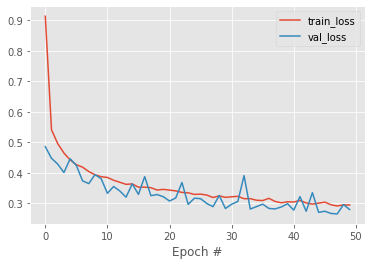

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.xlabel("Epoch #")
plt.legend()
#cv2_imshow(cv2.imread("plot.png"))

In [ ]:
import pandas as pd

scale = MinMaxScaler()
X = scale.fit_transform(X)

pd.DataFrame({
   'true': np.squeeze(y),
   'pred': np.squeeze(model.predict(X))
})

645/645 [==============================] - 1s 1ms/step


,true,pred
0,4.526,4.664814
1,3.585,4.650682
2,3.521,4.473070
3,3.413,4.092437
4,3.422,3.470301
...,...,...
20635,0.781,0.722359
20636,0.771,1.007061
20637,0.923,0.856911
20638,0.847,0.885098
